In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import json

In [2]:
with open('/Users/michaelcomerford/Documents/cars/ev/glasgowcc.json') as data_file:    
    d= json.load(data_file)  

df = json_normalize(d, 'ChargeDevice')

In [4]:
connectors = json_normalize(data=d['ChargeDevice'], record_path='Connector', 
                            meta=['ChargeDeviceId', 'Attribution'])
connectors.head(3)

ChargeMethod ChargeMode ChargePointStatus ConnectorId  \
0  Single Phase AC          3        In service           1   
1  Single Phase AC          3        In service           1   
2  Single Phase AC          3        In service           1   

                ConnectorType Information RatedOutputCurrent  \
0  Type 2 Mennekes (IEC62196)                             32   
1  Type 2 Mennekes (IEC62196)                             32   
2  Type 2 Mennekes (IEC62196)                             32   

  RatedOutputVoltage RatedOutputkW TetheredCable Validated  \
0                230           7.0             0         0   
1                230           7.0             0         0   
2                230           7.0             0         0   

            Attribution                    ChargeDeviceId  
0  ChargePlace Scotland  3f6dccc7509059cc433c6da56407c959  
1  ChargePlace Scotland  15a489297bc333543df57db9123d6735  
2  ChargePlace Scotland  a78b7e6c40f7572725aa95458f6f4d55

In [6]:
connectors.ChargeMethod.unique()

array([u'Single Phase AC', u'DC', u'Three Phase AC'], dtype=object)

In [10]:
df.Attribution.unique()

array([u'ChargePlace Scotland', u'Charge Your Car',
       u'Ecotricity (Electric Highway)', u'The GeniePoint Network',
       u'InstaVolt Ltd'], dtype=object)

In [17]:
providers = df.groupby('Attribution').size().reset_index(name='counts')

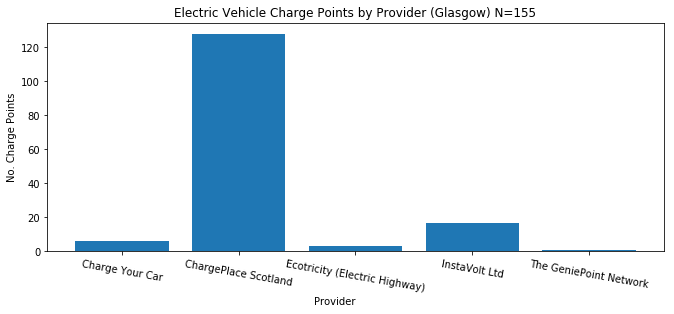

In [50]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.bar(providers.Attribution, providers.counts)
plt.xticks(rotation=-10)
plt.title("Electric Vehicle Charge Points by Provider (Glasgow) N=155")
ax.set_xlabel('Provider',horizontalalignment='right')
ax.set_ylabel('No. Charge Points')
plt.tight_layout(pad=3)
plt.savefig('providers.png')


In [ ]:
pd.read_

In [24]:
providers.counts.sum()

155